<a href="https://colab.research.google.com/github/Safwan-2006/voting-dapp/blob/main/BMI_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BMI classification (Underweight, Normal, Overweight)

In [38]:
import pandas as pd

# Path to your dataset
file_path = r"/content/BMI_Paper_data.csv"

# Define column names (as per your dataset structure)
columns = ["Age", "Height", "Weight", "BMI   ", "BMI_category"]

# Read the dataset
df = pd.read_csv(file_path, names=columns, header=0)  # header=0 if first row already has headers

# Display first 5 rows
print(df.head())


   Age  Height  Weight     BMI    BMI_category
0   61    1.85  109.30  31.935720   Overweight
1   60    1.71   79.02  27.023700   Overweight
2   60    1.55   74.70  31.092612   Overweight
3   60    1.46   35.90  16.841809  Underweight
4   60    1.58   97.10  38.896010   Overweight


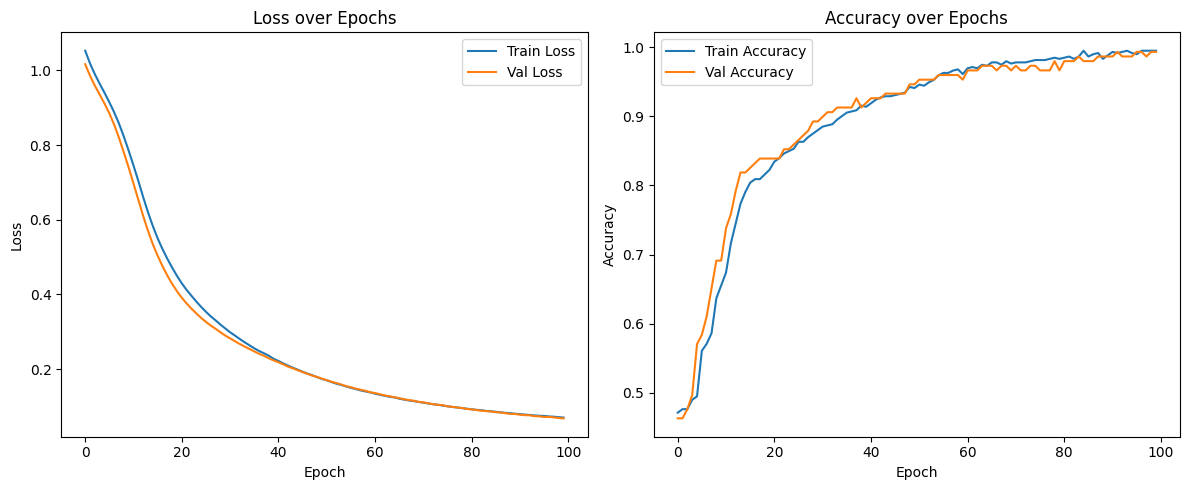

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


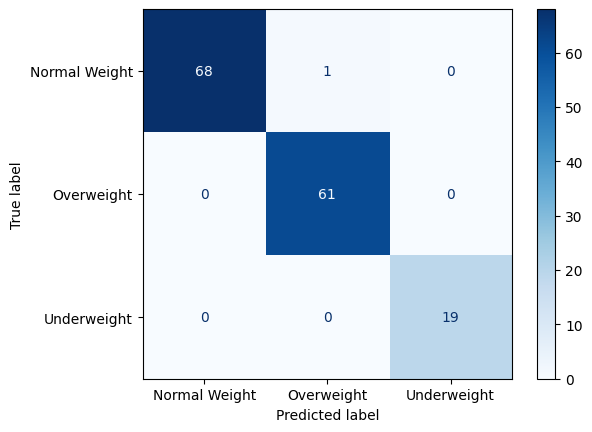

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense

# ---------------------------
# Preprocess Data
# ---------------------------

# Features: Age, Height, Weight
X = df[["Age", "Height", "Weight"]].values

# Target: BMI_category (One-hot encoded)
y = LabelBinarizer().fit_transform(df["BMI_category"])

# Normalize features
X = StandardScaler().fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------------------------
# Build ANN Model
# ---------------------------
model = Sequential([
    Input(shape=(X.shape[1],)),   # Explicit Input layer
    Dense(8, activation='relu'),
    Dense(6, activation='relu'),
    Dense(y.shape[1], activation='softmax')   # Output layer
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    validation_data=(X_test, y_test),
    verbose=0
)

# ---------------------------
# Plot Loss & Accuracy
# ---------------------------
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# ---------------------------
# Confusion Matrix
# ---------------------------
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np.unique(df["BMI_category"]))
disp.plot(cmap="Blues")
plt.show()


In [40]:
print("Total instances:", len(df))
print("Training instances:", len(X_train))
print("Test instances:", len(X_test))


Total instances: 741
Training instances: 592
Test instances: 149
